## 3. Boyutta Kuantum Fourier Dönüşümü

In [1]:
from cmath import exp
from math import pi, pow

import cirq
import numpy as np
from cirq import protocols
from matplotlib import pyplot

In [2]:
imag = complex(0, 1)
A = 2 * pi * imag / 3
B = 4 * pi * imag / 3

Unitaries = [
    [
        [np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex)],
        [np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, A, 0], [0, 0, B]], dtype=complex)],
        [np.array([[0, 0, B], [1, 0, 0], [0, A, 0]], dtype=complex)],
        [np.array([[0, A, 0], [0, 0, B], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, B, 0], [0, 0, A]], dtype=complex)],
        [np.array([[0, 0, A], [1, 0, 0], [0, B, 0]], dtype=complex)],
        [np.array([[0, B, 0], [0, 0, A], [1, 0, 0]], dtype=complex)]
    ]
]

In [3]:
class CustomUGate(cirq.Gate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix
        super().__init__()

    def _qid_shape_(self):
        return 3,
    
    def _num_qubits_():
        return 1

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [4]:
class QutritIdle(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return Unitaries[0][0][0]

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'I'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [5]:
class QutritHadamard(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1],
            [1, exp(A), exp(B)],
            [1, exp(B), exp(A)]
        ], dtype=complex)
        arr *= 1 / pow(3, 0.5)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [6]:
class QutritHadamardHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return QutritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [7]:
class QutritCNOT(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_(self):
        return 2

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, 0]
        ], dtype=complex)
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'X'))

    def __str__(self):
        return str(self._unitary_())

In [8]:
class QutritCNOTHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_():
        return 2

    @staticmethod
    def _unitary_():
        return QutritCNOT().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@\'', 'X'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [9]:
class ControlledQutritPhaseGate(cirq.Gate):
    def __init__(self, root):
        self._root = root
        
    def _qid_shape_(self):
        return 3, 3, 

    def _unitary_(self):
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, exp(A / self._root), 0, 0, 0, 0],
            [0, 0, 0, 0, 0, exp(B / self._root), 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, exp(A / self._root), 0],
            [0, 0, 0, 0, 0, 0, 0, 0, exp(B / self._root)]
        ], dtype=complex)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'Z'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [10]:
def test(shots, tersi=False):
    simulator = cirq.Simulator()
    q_0, q_1, q_2, q_3 = cirq.LineQid.range(4, dimension=3)
    
    circuit = cirq.Circuit()
    circuit.append(CustomUGate(Unitaries[0][1][0]).on(q_0))
    circuit.append(QutritHadamard().on(q_0))
    circuit.append(ControlledQutritPhaseGate(1).on(q_1, q_0))
    circuit.append(ControlledQutritPhaseGate(2).on(q_2, q_0))
    circuit.append(ControlledQutritPhaseGate(4).on(q_3, q_0))
    circuit.append(QutritHadamard().on(q_1))
    circuit.append(ControlledQutritPhaseGate(1).on(q_2, q_1))
    circuit.append(ControlledQutritPhaseGate(2).on(q_3, q_1))
    circuit.append(QutritHadamard().on(q_2))
    circuit.append(ControlledQutritPhaseGate(1).on(q_3, q_2))
    circuit.append(QutritHadamard().on(q_3))
    
    # Tersini bayrağı var ise Ters QFT.
    if tersi:
        circuit.append(QutritHadamard().on(q_3))
        circuit.append(ControlledQutritPhaseGate(1).on(q_3, q_2))
        circuit.append(QutritHadamard().on(q_2))
        circuit.append(ControlledQutritPhaseGate(2).on(q_3, q_1))
        circuit.append(ControlledQutritPhaseGate(1).on(q_2, q_1))
        circuit.append(QutritHadamard().on(q_1))
        circuit.append(ControlledQutritPhaseGate(4).on(q_3, q_0))
        circuit.append(ControlledQutritPhaseGate(2).on(q_2, q_0))
        circuit.append(ControlledQutritPhaseGate(1).on(q_1, q_0))
        circuit.append(QutritHadamard().on(q_0))


    circuit.append(cirq.measure(q_0, key="q0"))
    circuit.append(cirq.measure(q_1, key="q1"))
    circuit.append(cirq.measure(q_2, key="q2"))
    circuit.append(cirq.measure(q_3, key="q3"))
    results = simulator.run(circuit, repetitions=shots)
    print(circuit)
    return results

                        ┌──┐   ┌──┐   ┌──┐                   ┌──┐   ┌──┐   ┌────────┐
0 (d=3): ───U───H───Z────Z──────Z─────────────────────────────────────Z────────────Z────Z─────────H─────────M('q0')───
                    │    │      │                                     │            │    │
1 (d=3): ───────────@────┼H─────┼Z─────Z───────────────────────Z─────Z┼─────H──────┼────@─────────M('q1')─────────────
                         │      ││     │                       │     ││            │
2 (d=3): ────────────────@──────┼@─────┼H────Z───────────Z────H┼─────@┼────────────@────M('q2')───────────────────────
                                │      │     │           │     │      │
3 (d=3): ───────────────────────@──────@─────@───H───H───@─────@──────@─────M('q3')───────────────────────────────────
                        └──┘   └──┘   └──┘                   └──┘   └──┘   └────────┘
2000: 1024


Text(0, 0.5, 'Adet')

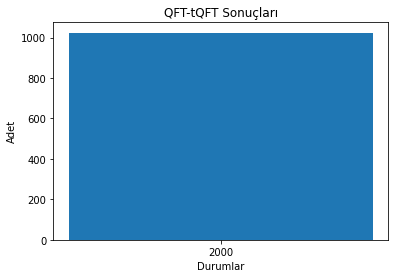

In [11]:
results = test(1024, tersi=True)
plot = dict()
for i in range(results.measurements["q0"].__len__()):
    value = "{}{}{}{}".format(results.measurements["q0"][i][0], results.measurements["q1"][i][0],
                             results.measurements["q2"][i][0], results.measurements["q3"][i][0])

    try:
        plot[value] += 1
    except KeyError:
        plot[value] = 1

sorted_plot = sorted(plot)
for key in sorted_plot:
    print("{}: {}".format(key, plot[key]))

pyplot.bar(plot.keys(), plot.values())
pyplot.title("QFT-tQFT Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

## 4. Boyutta Kuantum Fourier Dönüşümü

In [12]:
from cmath import exp
from math import pi

import time
import cirq
import numpy as np
from cirq import protocols

In [13]:
# complex 0 + 1i
Imag = complex(0, 1)

A = (2 * pi * Imag / 4)
B = (4 * pi * Imag / 4)
C = (6 * pi * Imag / 4)
D = (8 * pi * Imag / 4)
E = (12 * pi * Imag / 4)
F = (18 * pi * Imag / 4)

In [14]:
Unitaries = [
    [
        [np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]], dtype=complex)],
        [np.array([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]], dtype=complex)],
        [np.array([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0, 0], [0, A, 0, 0], [0, 0, B, 0], [0, 0, 0, C]], dtype=complex)],
        [np.array([[0, 0, 0, C], [1, 0, 0, 0], [0, A, 0, 0], [0, 0, B, 0]], dtype=complex)],
        [np.array([[0, 0, B, 0], [0, 0, 0, C], [1, 0, 0, 0], [0, A, 0, 0]], dtype=complex)],
        [np.array([[0, A, 0, 0], [0, 0, B, 0], [0, 0, 0, C], [1, 0, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0, 0], [0, B, 0, 0], [0, 0, D, 0], [0, 0, 0, E]], dtype=complex)],
        [np.array([[0, 0, 0, E], [1, 0, 0, 0], [0, B, 0, 0], [0, 0, D, 0]], dtype=complex)],
        [np.array([[0, 0, D, 0], [0, 0, 0, E], [1, 0, 0, 0], [0, B, 0, 0]], dtype=complex)],
        [np.array([[0, B, 0, 0], [0, 0, D, 0], [0, 0, 0, E], [1, 0, 0, 0]], dtype=complex)]

    ],
    [
        [np.array([[1, 0, 0, 0], [0, C, 0, 0], [0, 0, E, 0], [0, 0, 0, F]], dtype=complex)],
        [np.array([[0, 0, 0, F], [1, 0, 0, 0], [0, C, 0, 0], [0, 0, E, 0]], dtype=complex)],
        [np.array([[0, 0, E, 0], [0, 0, 0, F], [1, 0, 0, 0], [0, C, 0, 0]], dtype=complex)],
        [np.array([[0, C, 0, 0], [0, 0, E, 0], [0, 0, 0, F], [1, 0, 0, 0]], dtype=complex)]
    ]
]

In [15]:
class ControlledQuqritPhaseGate(cirq.Gate):
    def __init__(self, root):
        self.root = root
        
    def _qid_shape_(self):
        return 4, 4,

    def _unitary_(self):
        arr = np.zeros(shape=(16, 16), dtype=complex)
        arr[0][0], arr[1][1], arr[2][2], arr[3][3] = 1, 1, 1, 1
        arr[4][7], arr[5][4], arr[6][5], arr[7][6] = 1, 1, 1, 1
        arr[8][10], arr[9][11], arr[10][8], arr[11][9] = 1, exp(A / self.root), exp(B / self.root), exp(C / self.root)
        arr[12][13], arr[13][14], arr[14][15], arr[15][12] = 1, exp(A / self.root), exp(B / self.root), exp(C / self.root)
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def _circuit_diagram_info_(self, args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'Z^{}'.format(self.root)))

    def __str__(self):
        return str(self._unitary_())

class PlusOneGate(cirq.Gate):
    """ Plus One Gate """

    def __init__(self, dimension):
        super(PlusOneGate, self)
        self.dimension = dimension

    def _qid_shape_(self):
        return self.dimension,

    def _num_qubits_(self):
        return 1

    def _unitary_(self) -> np.ndarray:
        if self.dimension == 2:
            return np.array([[0, 1], [1, 0]], dtype=complex)

        zero = np.zeros(shape=(self.dimension, self.dimension), dtype=complex)
        zero[0][self.dimension - 1] = 1
        for i in range(1, self.dimension):
            zero[i][i - 1] = complex(1, 0)
        return zero

    def _circuit_diagram_info_(self, args) -> str:
        self.args = args
        return "[+1]"

    @property
    def unitary(self):
        return self._unitary_()

class QuqritHadamard(cirq.Gate):
    def _qid_shape_(self):
        return 4,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1, 1],
            [1, exp(A), exp(B), exp(C)],
            [1, exp(B), exp(D), exp(E)],
            [1, exp(C), exp(E), exp(F)]
        ], dtype=complex)
        arr *= 1 / 2
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class QuqritHadamardHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 4,

    @staticmethod
    def _unitary_():
        return QuqritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())
    
class CustomUGate(cirq.Gate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix

    def _qid_shape_(self):
        return 4,

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


In [18]:
def test(shots, tersi=False):
    simulator = cirq.Simulator()
    q_0, q_1, q_2, q_3 = cirq.LineQid.range(4, dimension=4)
    
    circuit = cirq.Circuit()
    circuit.append(CustomUGate(Unitaries[0][1][0]).on(q_0))
    circuit.append(QuqritHadamard().on(q_0))
    circuit.append(ControlledQuqritPhaseGate(1).on(q_1, q_0))
    circuit.append(ControlledQuqritPhaseGate(2).on(q_2, q_0))
    circuit.append(ControlledQuqritPhaseGate(4).on(q_3, q_0))
    circuit.append(QuqritHadamard().on(q_1))
    circuit.append(ControlledQuqritPhaseGate(1).on(q_2, q_1))
    circuit.append(ControlledQuqritPhaseGate(2).on(q_3, q_1))
    circuit.append(QuqritHadamard().on(q_2))
    circuit.append(ControlledQuqritPhaseGate(1).on(q_3, q_2))
    circuit.append(QuqritHadamard().on(q_3))
    
    if tersi:
        circuit.append(QuqritHadamard().on(q_3))
        circuit.append(ControlledQuqritPhaseGate(1).on(q_3, q_2))
        circuit.append(QuqritHadamard().on(q_2))
        circuit.append(ControlledQuqritPhaseGate(2).on(q_3, q_1))
        circuit.append(ControlledQuqritPhaseGate(1).on(q_2, q_1))
        circuit.append(QuqritHadamard().on(q_1))
        circuit.append(ControlledQuqritPhaseGate(4).on(q_3, q_0))
        circuit.append(ControlledQuqritPhaseGate(2).on(q_2, q_0))
        circuit.append(ControlledQuqritPhaseGate(1).on(q_1, q_0))
        circuit.append(QuqritHadamard().on(q_0))
    

    circuit.append(cirq.measure(q_0, key="q0"))
    circuit.append(cirq.measure(q_1, key="q1"))
    circuit.append(cirq.measure(q_2, key="q2"))
    circuit.append(cirq.measure(q_3, key="q3"))
    results = simulator.run(circuit, repetitions=shots)
    
    print(circuit)
       
    plot = dict()
    for i in range(results.measurements["q0"].__len__()):
        value = "{}{}{}{}".format(results.measurements["q0"][i][0], results.measurements["q1"][i][0],
                                 results.measurements["q2"][i][0], results.measurements["q3"][i][0])
        
        try:
            plot[value] += 1
        except KeyError:
            plot[value] = 1
    sorted_plot = sorted(plot)
    
    if tersi:
        for key in sorted_plot:
            print("{}: {}".format(key, plot[key]))
            
    pyplot.bar(plot.keys(), plot.values())
    pyplot.title("QFT-tQFT Sonuçları")
    pyplot.xlabel("Durumlar")
    pyplot.ylabel("Adet")

                          ┌────┐   ┌──────┐   ┌────┐                       ┌────┐   ┌──────┐   ┌──────────┐
0 (d=4): ───U───H───Z^1────Z^2──────Z^4─────────────────────────────────────────────────Z^4────────────Z^2────Z^1───────H─────────M('q0')───
                    │      │        │                                                   │              │      │
1 (d=4): ───────────@──────┼──H─────┼──Z^1─────Z^2───────────────────────────Z^2─────Z^1┼───────H──────┼──────@─────────M('q1')─────────────
                           │        │  │       │                             │       │  │              │
2 (d=4): ──────────────────@────────┼──@───────┼──H────Z^1───────────Z^1────H┼───────@──┼──────────────@──────M('q2')───────────────────────
                                    │          │       │             │       │          │
3 (d=4): ───────────────────────────@──────────@───────@─────H───H───@───────@──────────@───────M('q3')─────────────────────────────────────
                     

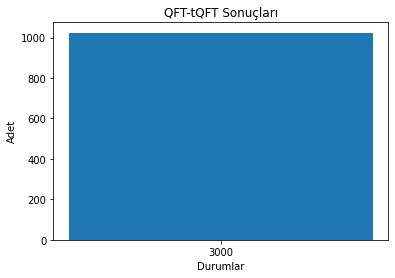

In [19]:
test(1024, tersi=True)